# Ejercicio 1 (5 puntos)

Programar el método de Gauss-Newton para resolver el problema de mínimos cuadrados no lineales

$$ \min_z  f(z) = \frac{1}{2} \sum_{j=1}^m r_j^2(z), $$
       
donde $r_j: \mathbb{R}^n \rightarrow \mathbb{R}$ para $j=1,...,m$.
Si definimos la función $R: \mathbb{R}^n \rightarrow \mathbb{R}^m$ como

$$ R(z) = \left( \begin{array}{c}
            r_{1}(z) \\
            \vdots \\
            r_{m}(z) \\
        \end{array} \right),
$$

entonces

$$ \min_z  f(z) = \frac{1}{2} R(z)^\top R(z). $$

---

Dar la función de residuales $R(z)$,
la función Jacobiana $J(z)$, un  punto inicial $z_0$, un número máximo de 
iteraciones $N$, y una tolerancia $\tau>0$.

1. Hacer $res=0$.

2. Para $k = 0, 1, ..., N$:

* Calcular $R_k = R(z_k)$
* Calcular $J_{k} = J(z_k)$
* Calcular la dirección de descenso $p_k$ resolviendo el sistema

$$  J_{k}^\top J_{k} p_k = -J_{k}^\top R_{k} $$

* Si $\|p_k\|<\tau$, hacer $res=1$ y terminar el ciclo
* Hacer $z_{k+1} = z_k +  p_k$.

3. Devolver $z_k, R_k,  k, \|p_k\|$ y $res$.

---

1. Escriba una función que implementa el algoritmo anterior 
   usando arreglos de Numpy. 
   
2. Leer el archivo **puntos2D_1.npy**
   que contiene una matriz con dos columnas. 
   La primer columna tiene los valores $x_1, x_2, ..., x_m$ y en la segunda
   columna los valores $y_1, y_2, ..., y_m$, de modo que cada par 
   $(x_i, y_i)$ es un dato. 
   Queremos ajustar al conjunto de puntos $(x_i, y_i)$ el modelo 
   
   $$  A \sin(w x + \phi)$$
   
   por lo que la función $R(\mathbf{z})=R(A, w, \phi)$ 
   está formada por los residuales 
   
   $$ r_i(z) = r_i(A, w, \phi) = A \sin(w x_i + \phi) - y_i $$
   
   para $i=1,2,...,m$.
   
   Programe la función $R(\mathbf{z})$ con $\mathbf{z} = (A, w, \phi)$ 
   y su Jacobiana $J(\mathbf{z})$.
   
   **Nota:** Puede programar estas funciones de la forma `funcion(z, paramf)`,
   donde `paramf` corresponda a la matriz que tiene los puntos $(x_i,y_i)$.
   También puede pasar el arreglo `paramf` como arumento del algoritmo para
   que pueda evaluar las funciones.
   
3. Use el algoritmo con estas funciones $R(\mathbf{z})$ y $J(\mathbf{z})$, el punto inicial 
   $\mathbf{z}_0  = (15, 0.6, 0)$ (esto es $A_0=15$, $w_0=0.6$ y $\phi_0=0$), un número
   máximo de iteraciones $N=5000$ y una tolerancia $\tau =\sqrt{\epsilon_m}$
   donde $\epsilon_m$ es el épsilon máquina.

* Imprima el valor inicial $f(\mathbf{z}_0) =  \frac{1}{2} R(\mathbf{z}_0)^\top R(\mathbf{z}_0)$.
* Ejecute el algoritmo e imprima un mensaje que indique si el algoritmo 
  converge dependiendo de la variable $res$.
* Imprima $\mathbf{z}_k$, $f(\mathbf{z}_k) =  \frac{1}{2} R(\mathbf{z}_k)^\top R(\mathbf{z}_k)$,
  la norma $\|p_k\|$, y el número de iteraciones $k$ realizadas.

4. Genere una gráfica que muestre a los puntos $(x_i, y_i)$ y la
   gráfica del modelo  $z_{k0} \sin(z_{k1} x + z_{k2})$, evaluando
   esta función en el intervalo
   
$$x \in [\min x_i, \max x_i]$$

5. De la gráfica de los datos, e interpretando el parámetro $A$ como la amplitud
   de la onda, se ve que  $A_0=15$ es una buena inicialización para este paramétro.
   Para los otros parámetros también se debería usar su interpretación para dar 
   buenos valores iniciales. Repita las pruebas con los puntos iniciales
   $\mathbf{z}_0  = (15, 1, 0)$  y $\mathbf{z}_0  = (15, 0.6, 1.6)$.

## Solución

Importaremos el módulo `lib_t7` que está en el mismo directorio que este notebook. En este módulo está la función `gauss_newton_nlls` que implementa el método de Gauss-Newton en el contexto de mínimos cuadrados no lineales. 

En la función `proof_gauss_newton_nlls` se encuentra el ajuste resultante de aplicar el algoritmo de Gauss-Newton al conjunto de puntos $(x_i,y_i)$ en `puntos2D_1.npy` suponiendo el modelo 
$$ \Psi(\mathbf{z})=\Psi(A,\omega,\phi)=A\sin(\omega x+\phi)$$

A continuación, haremos el ajuste anterior para 3 condiciones iniciales diferentes y considerando un número máximo de iteraciones $N=5000$ y una tolerancia $\tau=\sqrt{\epsilon_m}$

### Condición inicial $\mathbf{z}_0=(15,0.6,0)$

El resultado para esta condición inicial es el siguiente

El algoritmo de Gauss-Newton CONVERGE
z0 =  [15.   0.6  0. ]
f(z0) =  45454.05280978729
zk =  [12.99606648  1.19935917 -5.67317097]
f(zk) =  457.1693612130722
|pk| =  1.4545189678275178e-08
k =  8


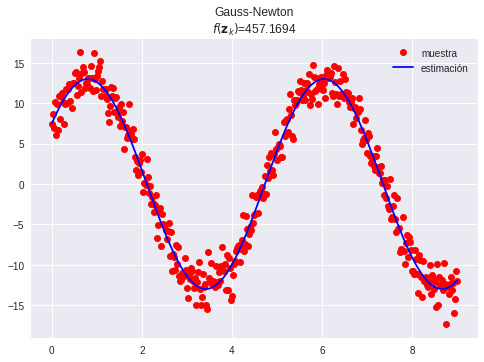

In [1]:
import numpy as np
import importlib
import lib_t7
importlib.reload(lib_t7)
from lib_t7 import *

# Iteraciones maximas y tolerancia
N=5000
tol=np.finfo(float).eps**(1/2)

# Muestra
sample=np.load('puntos2D_1.npy')

# Condiciones iniciales
z0=[np.array([15.0,0.6,0.0]),
np.array([15.0,1.0,0.0]),
np.array([15.0,0.6,1.6])]

# Resultados del Algoritmo Gauss
proof_gauss_newton_nlls(R,J,z0[0],N,tol,sample)

Pusimos en el título del plot el valor de la función objetivo en el punto al que converge el algoritmo.

### Condición inicial $\mathbf{z}_0=(15,1,0)$

Ahora variando la frecuencia del modelo $\Psi$ en al condición inicial obtenemos el siguiente resultado. 

El algoritmo de Gauss-Newton CONVERGE
z0 =  [15.  1.  0.]
f(z0) =  40807.16289819636
zk =  [-1.11472532e-01  9.85781641e+01 -3.32725905e+02]
f(zk) =  18654.618220305696
|pk| =  1.348024075214489e-08
k =  66


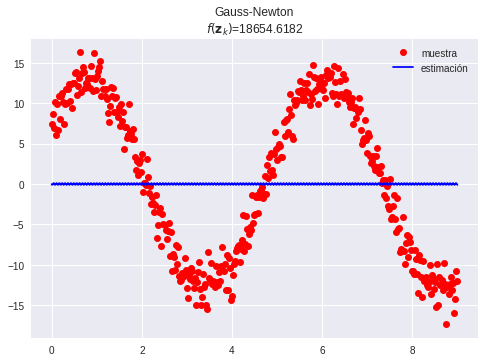

In [2]:
# Resultados del Algoritmo Gauss
proof_gauss_newton_nlls(R,J,z0[1],N,tol,sample)

### Condición inicial $\mathbf{z}_0=(15,0.6,1.6)$

Finalmente, para esta condición inicial el resultado es


El algoritmo de Gauss-Newton CONVERGE
z0 =  [15.   0.6  1.6]
f(z0) =  37048.62007346928
zk =  [  -0.25186599   59.17703745 -214.18352473]
f(zk) =  18649.518793671767
|pk| =  1.3802970551977972e-08
k =  68


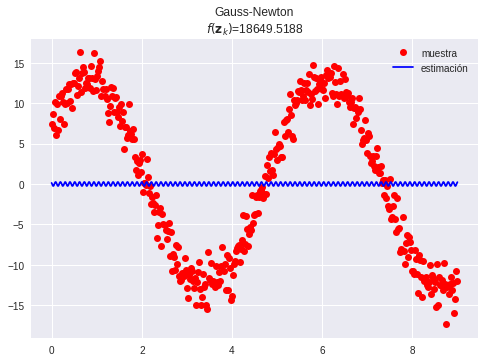

In [3]:
# Resultados del Algoritmo Gauss
proof_gauss_newton_nlls(R,J,z0[2],N,tol,sample)

Observamos que el número de condición de $J(\mathbf{z}_0)^TJ(\mathbf{z}_0)$ en cada una de las condiciones iniciales es 

In [4]:
for k,p0 in enumerate(z0):
    print(f'El num de condicion de J(z0).TJ(z0) en la condicion inicial {k+1} es: ')
    print(np.linalg.cond(J(p0,sample).T@J(p0,sample)))


El num de condicion de J(z0).TJ(z0) en la condicion inicial 1 es: 
4319.205562634667
El num de condicion de J(z0).TJ(z0) en la condicion inicial 2 es: 
5528.751104008563
El num de condicion de J(z0).TJ(z0) en la condicion inicial 3 es: 
9222.650564875052


No hay diferencias tan grandes entre las tres condiciones iniciales, sin embargo la única en la que se obtiene un buen ajuste es en la primera. 

Por otro lado, el número de condición para cada condición inicial es considerable lo que puede explicar que en el caso de las condiciones 2 y 3 no se llegue al mismo resultado que en la condición inicial 1.

Además una de las desventajas del método de Gauss-Newton es que no se tiene convergencia al óptimo global, que fue lo que sucedió en las condiciones iniciales 2 y 3, hubo convergencia pero a un óptimo local probablemente.

# Ejercicio 2 (5 puntos)

Programar el método de Levenberg-Marquardt para mínimos cuadrados.

---
Dar la función de residuales $R(z)$,
la función Jacobiana $J(z)$, un  punto inicial $z_0$, un número máximo de 
iteraciones $N$, $\mu_{\text{ref}}>0$ y la tolerancia $\tau>0$.

1. Hacer $res=0$ y construir la matriz identidad $I$ de tamaño igual a la dimensión de $z_0$.
2. Calcular $R_0 = R(z_0)$
3. Calcular $J_{0} = J(z_0)$
4. Calcular $f_0  = 0.5R_0^\top R_0$
5. Calcular $\mathbf{A}  = J_0^\top J_0$ y $\mathbf{g} = J_0^\top R_0$
6. Calcular $\mu = \min\{ \mu_{ref}, \max a_{ii} \}$, donde $a_{ii}$ son los 
   elementos de la diagonal de la matriz $\mathbf{A}$.
7. Para $k = 0, 1, ..., N$:

* Calcular $\mathbf{p}_k$ resolviendo el sistema

$$  (\mathbf{A}  + \mu \mathbf{I}) \mathbf{p}_k = -\mathbf{g} $$

* Si $\|\mathbf{p}_k\|<\tau$, hacer $res=1$ y  terminar el ciclo.
* Calcular $\mathbf{z}_{k+1} = \mathbf{z}_k + \mathbf{p}_k$ 

* Calcular $\mathbf{R}_{k+1} = \mathbf{R}(\mathbf{z}_{k+1})$
* Calcular $f_{k+1} = 0.5\mathbf{R}_{k+1}^\top \mathbf{R}_{k+1}$

* Calcular el parámetro $\rho$ (ver las notas de la clase 16)

$$\rho = (f_k - f_{k+1})/(q_k(\mathbf{x}_k) - q_k(\mathbf{x}_{k+1})) = 
  (f_k - f_{k+1})/(-0.5\mathbf{p}_k^\top \mathbf{g} + 0.5\mu_k \mathbf{p}_k^\top \mathbf{p}_k ) $$ 
  
* Si $\rho<0.25$, hacer $\mu = 2\mu$.
* Si $\rho>0.75$, hacer $\mu = \mu/3$.
* Calcular $\mathbf{J}_{k+1}    = \mathbf{J}(\mathbf{z}_{k+1})$
* Calcular $\mathbf{A} = \mathbf{J}_{k+1}^\top \mathbf{J}_{k+1}$ y 
  $\mathbf{g} = \mathbf{J}_{k+1}^\top \mathbf{R}_{k+1}$.

8. Devolver el punto $\mathbf{z}_k$, $f_k$, $k$ y $res$.
---

1. Escriba una función que implementa el algoritmo anterior 
   usando arreglos de Numpy. 
   
2. Aplique este algoritmo para resolver el problema del Ejercicio 1,
   imprimiendo la misma información y generando la gráfica correspondiente, 
   usando $\tau   = \sqrt{\epsilon_m}, N=5000, \mu_{\text{ref}}  = 0.001$
   y los tres puntos iniciales 
   
$$\mathbf{z}_0 = (15, 0.6, 0)$$
$$\mathbf{z}_0 = (15, 1.0, 0)$$
$$\mathbf{z}_0 = (15, 0.6, 1.6)$$

## Solución

Al igual que en el ejercicio anterior, las funciones que realizan lo que se pide están en el módulo `lib_t7`.

La función que implementa el algoritmo de Levenberg-Marquardt con parámetro de regularización $\mu$ que se actualiza iterativamente usando la razón de ganancia $\rho$ es `levenberg_marquardt_nlls`. Por otro lado, la función que ajusta el modelo $\Psi$ al conjunto de puntos en `puntos2D_1.npy` usando el algoritmo de Levenberg-Marquardt es `proof_levenberg_marquardt_nlls`.

A continuación mostramos el desempeño de este algoritmo con las 3 condiciones iniciales solicitadas.

### Condición inicial $\mathbf{z}_0=(15,0.6,0)$

El resultado con esta condición inicial es

El algoritmo de Levenberg-Marquardt CONVERGE
z0 =  [15.   0.6  0. ]
f(z0) =  45454.05280978729
zk =  [12.99606648  1.19935917 -5.67317097]
f(zk) =  457.16936121307214
|pk| =  1.4549146764407206e-08
k =  8


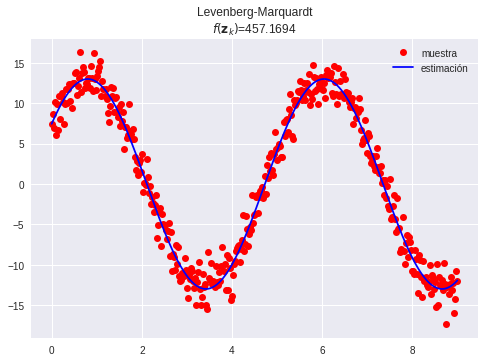

In [5]:
importlib.reload(lib_t7)
from lib_t7 import *

# Parametro de regularizacion
mu_ref=0.001

proof_levenberg_marquardt_nlls(R,J,z0[0],N,tol,mu_ref,sample)

El resultado es similar al obtenido por Gauss-Newton incluso en el valor de la función objetivo en el último punto de la trayectoria.

### Condición inicial $\mathbf{z}_0=(15,1,0)$

Mostramos el resultado con la segunda condición inicial

El algoritmo de Levenberg-Marquardt CONVERGE
z0 =  [15.  1.  0.]
f(z0) =  40807.16289819636
zk =  [  0.24437787 -17.31400178  26.79331113]
f(zk) =  18649.792255409797
|pk| =  1.2596492950063504e-08
k =  37


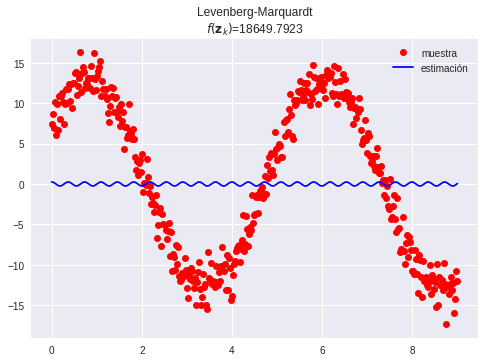

In [6]:
proof_levenberg_marquardt_nlls(R,J,z0[1],N,tol,mu_ref,sample)

### Condición inicial $\mathbf{z}_0=(15,0.6,1.6)$

Finalmente, el resultado con la condición inicial 3 es 

El algoritmo de Levenberg-Marquardt CONVERGE
z0 =  [15.   0.6  1.6]
f(z0) =  37048.62007346928
zk =  [  0.25620933   4.08962698 -24.29530542]
f(zk) =  18620.150604673836
|pk| =  7.461281545956077e-09
k =  49


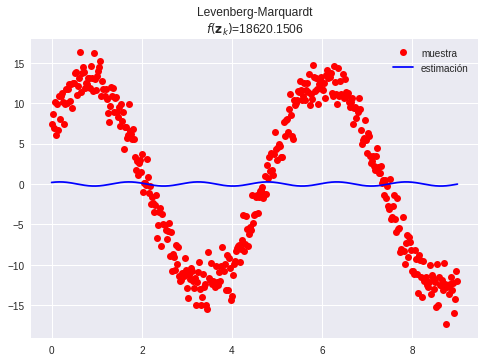

In [7]:
proof_levenberg_marquardt_nlls(R,J,z0[2],N,tol,mu_ref,sample)

Aunque no se obtuvo una solución con el ajuste de la condición inicial 1 usando las condiciones iniciales 2 y 3, el algoritmo de Levenberg-Marquardt resultó más eficiente en el número de iteraciones, al menos en la tercer condición inicial.

Lo que se observa de estas soluciones es que las obtenidas por Levenberg-Marquardt oscilan menos que las obtenidas por Gauss-Newton y esto es el efecto de la regularización, ya que nos permite controlar la norma de la solución a la que llegamos, en consecuencia, los valores de la amplitud, la frecuencia y la fase son más pequeños en valor absoluto que los encontrados con Gauss-Newton.